## Final Project Submission

Please fill out:
* Student name: Samuel Wanga
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


# Overview

This project analyzes data from The Numbers and Box Office Mojo to help Microsoft decide on International Market, Partnerships and Distribution and Audiences preferences for their new studio.

# Workflow

There are two directions;


1. Zipped Data from `tmdb.movies.csv.gz` and `tn.movie_budgets.csv.gz`
2. Using The Numbers which is scrapped data `Scrapped1.csv`
   For trials

# DIRECTION 1

# The Movie DB

Now we open the files `tmdb.movies.csv.gz` and `tn.movie_budgets.csv.gz`

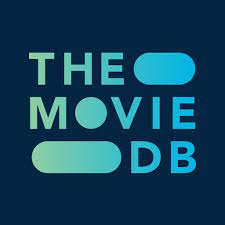

In [24]:
#import pandas and gzip
import pandas as pd
import gzip

# Open and Merge

Since there are two files to merge together, we will first open them. 

Open `tmdb.movies.csv.gz` and `tn.movie_budgets.csv.gz`.

In [25]:
# Specify the file paths for both files
tmdb_file_path = r'C:\Users\HP 240 G7\COURSE\PROJECT\dsc-phase-1-project-v2-4-master\zippedData/tmdb.movies.csv.gz'
budgets_file_path = r'C:\Users\HP 240 G7\COURSE\PROJECT\dsc-phase-1-project-v2-4-master\zippedData/tn.movie_budgets.csv.gz'

# Open and read the first file (tmdb.movies.csv.gz)
with gzip.open(tmdb_file_path, 'rb') as f:
    movie_gross_df = pd.read_csv(f)

# Open and read the second file (tn.movie_budgets.csv.gz)
with gzip.open(budgets_file_path, 'rb') as f:
    movie_budgets_df = pd.read_csv(f)

# Display the first few rows of each DataFrame
print("tmdb.movies.csv.gz:")
print(movie_gross_df.head())
print("\ntn.movie_budgets.csv.gz:")
print(movie_budgets_df.head())

tmdb.movies.csv.gz:
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       

# Merge

Merge the files using `merge()`

In [5]:
# Merge the dataframes on movie titles
combined_df = pd.merge(movie_gross_df, movie_budgets_df, left_on='original_title', right_on='movie')

# Display the first few rows of the combined DataFrame
print(combined_df.head())

   Unnamed: 0            genre_ids   id_x original_language  \
0           1  [14, 12, 16, 10751]  10191                en   
1           2        [12, 28, 878]  10138                en   
2           3      [16, 35, 10751]    862                en   
3        2473      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

             original_title  popularity release_date_x  \
0  How to Train Your Dragon      28.734     2010-03-26   
1                Iron Man 2      28.515     2010-05-07   
2                 Toy Story      28.005     1995-11-22   
3                 Toy Story      28.005     1995-11-22   
4                 Inception      27.920     2010-07-16   

                      title  vote_average  vote_count  id_y release_date_y  \
0  How to Train Your Dragon           7.7        7610    30   Mar 26, 2010   
1                Iron Man 2           6.8       12368    15    May 7, 2010   
2                 Toy Story           

Check the first few rows and last ones as well

In [26]:
# Display the first few rows of the DataFrame
combined_df.head()

,movie,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,how to train your dragon,28.734,2010-03-26,7.7,7610,165000000,217581232,494870992
1,iron man 2,28.515,2010-05-07,6.8,12368,170000000,312433331,621156389
2,toy story,28.005,1995-11-22,7.9,10174,30000000,191796233,364545516
4,inception,27.920,2010-07-16,8.3,22186,160000000,292576195,835524642
5,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,6.1,4229,95000000,88768303,223050874


In [7]:
combined_df.tail()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
2311,26323,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,"Nov 6, 2009",The Box,"$25,000,000","$15,051,977","$34,356,760"
2312,26425,[10402],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,"Nov 6, 2009",The Box,"$25,000,000","$15,051,977","$34,356,760"
2313,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,"May 24, 2002",Enough,"$38,000,000","$39,177,215","$50,970,660"
2314,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,"Aug 26, 2005",Undiscovered,"$9,000,000","$1,069,318","$1,069,318"
2315,26508,[16],514492,en,Jaws,0.600,2018-05-29,Jaws,0.0,1,41,"Jun 20, 1975",Jaws,"$12,000,000","$260,000,000","$470,700,000"


#  Cleaning Data

Let us clean the file for any errors or corrections.

Get information about the file.

Use `.info()`

In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1908 entries, 0 to 2315
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1908 non-null   object        
 1   popularity         1908 non-null   float64       
 2   release_date       1908 non-null   datetime64[ns]
 3   vote_average       1908 non-null   float64       
 4   vote_count         1908 non-null   int64         
 5   production_budget  1908 non-null   int64         
 6   domestic_gross     1908 non-null   int64         
 7   worldwide_gross    1908 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 134.2+ KB


It contains 2316 entries (rows) and 16 columns. `genre_ids` has 2316 entries have non-null values of type object. `id` is 2316 non-null values of tpe int64. `original_language` has 2316 non-null object values.  `original_title` has 2316 non-null object values. `popularity` has 2316 non-null object values of type float64. `release_date` has 2316 non-null object values. `title` has 2316 non-null object values. `vote_average` has 2316 non-null object values of type float64. `vote_count` is 2316 non-null values of tpe int64. `id_y` is 2316 non-null values of tpe int64. `release_date_y` has 2316 entries have non-null values of type object. `movie` has 2316 entries have non-null values of type object. `production_budget` has 2316 entries have non-null values of type object. `domestic_gross` has 2316 entries have non-null values of type object. 
`worldwide_gross` has 2316 entries have non-null values of type object. No missing record.

In [28]:
combined_df.head()

,movie,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,how to train your dragon,28.734,2010-03-26,7.7,7610,165000000,217581232,494870992
1,iron man 2,28.515,2010-05-07,6.8,12368,170000000,312433331,621156389
2,toy story,28.005,1995-11-22,7.9,10174,30000000,191796233,364545516
4,inception,27.920,2010-07-16,8.3,22186,160000000,292576195,835524642
5,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,6.1,4229,95000000,88768303,223050874


# Remove Duplicates and Convert

Convert `original_title` and `movie` columns to lowercase and remove leading/trailing spaces.

Next remove duplicates from the `combined_df` based on preprocessed columns using `drop_duplicates()` method.

In [30]:
# Convert 'original_title' and 'movie' columns
combined_df['original_title'] = combined_df['original_title'].str.strip().str.lower()
combined_df['movie'] = combined_df['movie'].str.strip().str.lower()

# Remove duplicates from the combined DataFrame based on preprocessed columns
combined_df = combined_df.drop_duplicates(subset=['original_title', 'movie'])

In [11]:
#Check .head()
combined_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,how to train your dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",how to train your dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,iron man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010",iron man 2,"$170,000,000","$312,433,331","$621,156,389"
2,3,"[16, 35, 10751]",862,en,toy story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",toy story,"$30,000,000","$191,796,233","$364,545,516"
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010",inception,"$160,000,000","$292,576,195","$835,524,642"
5,5,"[12, 14, 10751]",32657,en,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,"Feb 12, 2010",percy jackson & the olympians: the lightning t...,"$95,000,000","$88,768,303","$223,050,874"


# Drop columns

Drop the columns "Unnamed: 0" and "genre_ids" from the DataFrame `movie_gross_df` using the `.drop()` method.

In [12]:
# Code Here
combined_df.drop(columns=['Unnamed: 0', 'genre_ids', 'id_x', 'title', 'original_language', 'id_y', 'release_date_y', 'movie' ], inplace=True)

In [13]:
# Check
combined_df.head()

,original_title,popularity,release_date_x,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,how to train your dragon,28.734,2010-03-26,7.7,7610,"$165,000,000","$217,581,232","$494,870,992"
1,iron man 2,28.515,2010-05-07,6.8,12368,"$170,000,000","$312,433,331","$621,156,389"
2,toy story,28.005,1995-11-22,7.9,10174,"$30,000,000","$191,796,233","$364,545,516"
4,inception,27.920,2010-07-16,8.3,22186,"$160,000,000","$292,576,195","$835,524,642"
5,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,6.1,4229,"$95,000,000","$88,768,303","$223,050,874"


# Rename

Change the column name `original_title` to `movie` and `release_date_x` column to `release_date` in the DataFrame movie_gross_df, you can use the `.rename()`.

In [14]:
# Rename the 'original_title' column to 'movie'
combined_df.rename(columns={'original_title': 'movie'}, inplace=True)

# Rename the 'release_date_x' column to 'release_date'
combined_df.rename(columns={'release_date_x': 'release_date'}, inplace=True)

In [15]:
combined_df.head()

,movie,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,how to train your dragon,28.734,2010-03-26,7.7,7610,"$165,000,000","$217,581,232","$494,870,992"
1,iron man 2,28.515,2010-05-07,6.8,12368,"$170,000,000","$312,433,331","$621,156,389"
2,toy story,28.005,1995-11-22,7.9,10174,"$30,000,000","$191,796,233","$364,545,516"
4,inception,27.920,2010-07-16,8.3,22186,"$160,000,000","$292,576,195","$835,524,642"
5,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,6.1,4229,"$95,000,000","$88,768,303","$223,050,874"


Check `.info()`.

In [16]:
#Check the status using .info()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1908 entries, 0 to 2315
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1908 non-null   object 
 1   popularity         1908 non-null   float64
 2   release_date       1908 non-null   object 
 3   vote_average       1908 non-null   float64
 4   vote_count         1908 non-null   int64  
 5   production_budget  1908 non-null   object 
 6   domestic_gross     1908 non-null   object 
 7   worldwide_gross    1908 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 134.2+ KB


# Change Datatype

Change datatype for `production_budget`, `domestic_gross` and `worldwide_gross` to integers.

We first import `numpy`. Then convert the specified columns to `int`.

In [17]:
#import numpy
import numpy as np

# Convert numeric columns to strings
combined_df['production_budget'] = combined_df['production_budget'].astype(str)
combined_df['domestic_gross'] = combined_df['domestic_gross'].astype(str)
combined_df['worldwide_gross'] = combined_df['worldwide_gross'].astype(str)

# Convert specified columns to integers
combined_df['production_budget'] = combined_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(np.int64)
combined_df['domestic_gross'] = combined_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)
combined_df['worldwide_gross'] = combined_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

# Check data types of the columns
print(combined_df[['production_budget', 'domestic_gross', 'worldwide_gross']].dtypes)

production_budget    int64
domestic_gross       int64
worldwide_gross      int64
dtype: object


In [18]:
# Check .head()
combined_df.head()

,movie,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,how to train your dragon,28.734,2010-03-26,7.7,7610,165000000,217581232,494870992
1,iron man 2,28.515,2010-05-07,6.8,12368,170000000,312433331,621156389
2,toy story,28.005,1995-11-22,7.9,10174,30000000,191796233,364545516
4,inception,27.920,2010-07-16,8.3,22186,160000000,292576195,835524642
5,percy jackson & the olympians: the lightning t...,26.691,2010-02-11,6.1,4229,95000000,88768303,223050874


# Exploratory Data Analysis

Let us explore the distribution of numerical features using descriptive statistics and visualizations such as histograms, box plots, and scatter plots.

In [19]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot

Create a scatter plot below.

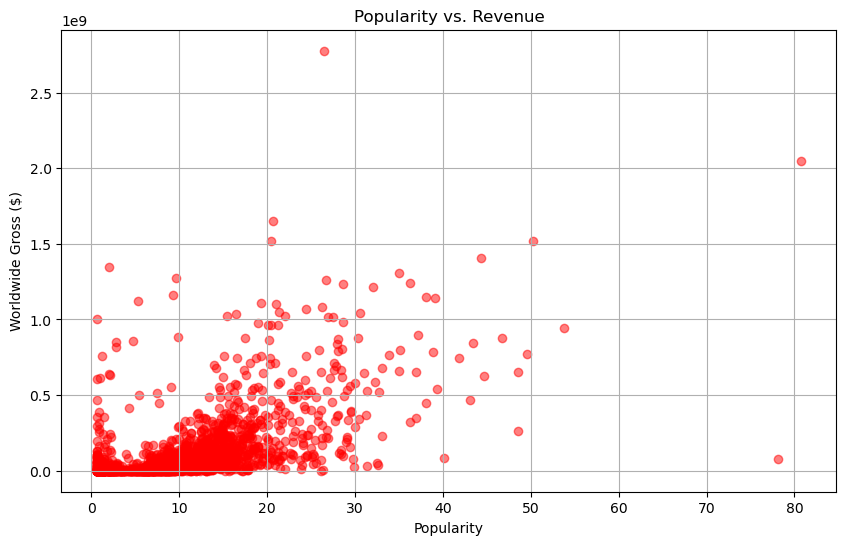

In [20]:
# Code Here
# Scatter plot for popularity vs. revenue
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['popularity'], combined_df['worldwide_gross'], color='red', alpha=0.5)
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)
plt.show()

# Conclusion

A positive correlation between popularity and revenue. Notice that movies with higher popularity tend to generate higher revenue.

# Line Plot

Create a line plot to visualize the `Average Revenue by Release Year` with the `Release Year` and `Average Revenue`($) in combined_df DataFrame.

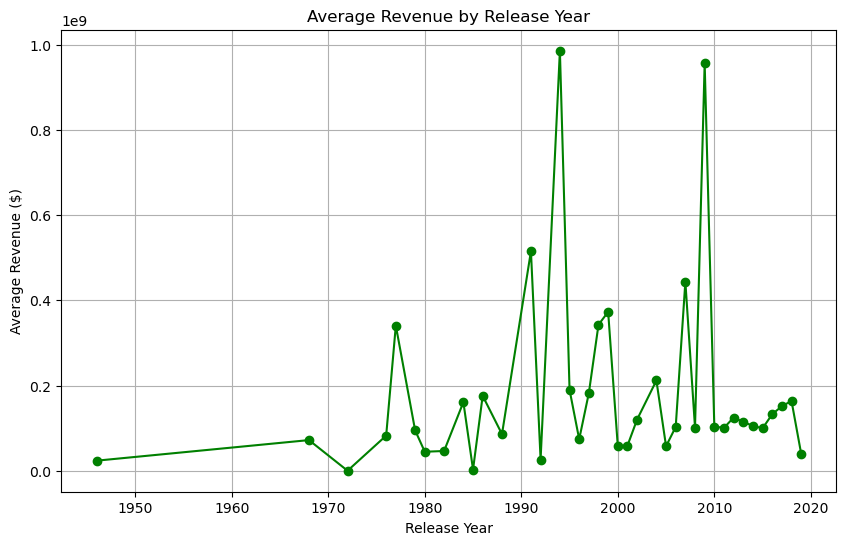

In [21]:
# Convert release_date to datetime format
combined_df['release_date'] = pd.to_datetime(combined_df['release_date'])

# Group by release year and calculate average revenue
average_revenue_by_year = combined_df.groupby(combined_df['release_date'].dt.year)['worldwide_gross'].mean()

# Plot line plot for average revenue by release year
plt.figure(figsize=(10, 6))
plt.plot(average_revenue_by_year.index, average_revenue_by_year.values, marker='o', color='green')
plt.title('Average Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue ($)')
plt.grid(True)
plt.show()

# Conclusion

In terms of Seasonal Patterns, the plot may reveals peak seasons for blockbuster releases or periods of low audience turnout.
As we can see in 2020 there was a significant drop. Recognizing these patterns allows the company to plan movie releases strategically to maximize revenue potential.

Also risk Assessment enables the company to assess the potential risks associated with movie ventures. For instance, there was a period of declining revenue in 2020, this helps implement risk mitigation strategies or diversify its movie portfolio to spread risk.

# Bar Graph

Show a bar graph showing the movies with the `highest popularity`. Sort the DataFrame by `popularity` and then select the `top 10 movies` with the `highest popularity`.

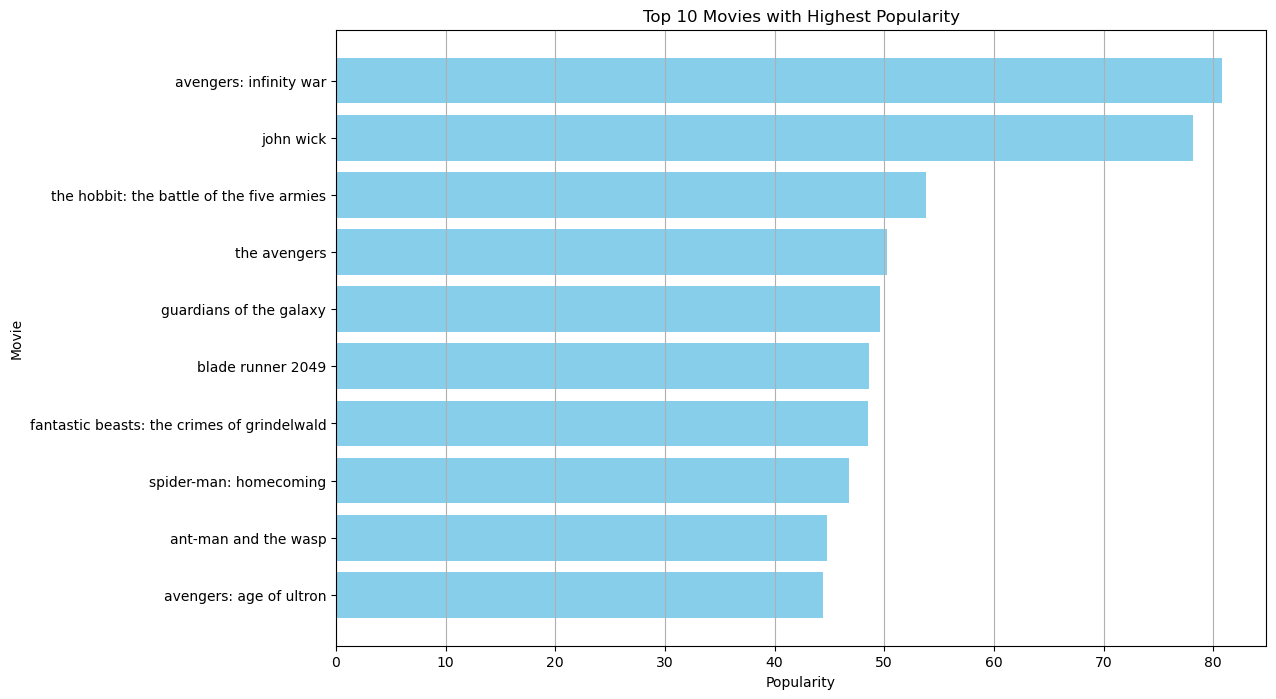

In [33]:
# Sort the DataFrame by popularity and select the top N movies with the highest popularity
top_10_popular_movies = combined_df.sort_values(by='popularity', ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.barh(top_10_popular_movies['movie'], top_10_popular_movies['popularity'], color='skyblue')
plt.title('Top 10 Movies with Highest Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest popularity at the top
plt.grid(axis='x')
plt.show()


# Conclusion

The action movies from the same production studio (Marvel) have generated more popularity five times. And also the genre for action is in all movies.

# DIRECTION 2

# Import the work

We will first take a look at the records that we got through scrapping. First the import the necessary libraries to proceed. That is `pandas` library.

In [1]:
#Import here
import pandas as pd

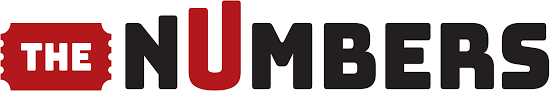 


# Open the database

Now import the library from `file_path` = `Name_of_file.csv`

Use `pd.read_csv`. This is like asking Python to read a file, specifically a CSV file (a type of spreadsheet) containing data. It tells Python where to find the data. And lastly `encoding='utf-8'`This part ensures that the data is read properly, especially if it contains characters from different languages or special symbols.

In [41]:
# Create a path for file named 'Scrapped1.csv'
file_path = 'Scrapped1.csv'

# Reading the CSV file with UTF-8 encoding
scrapped_data = pd.read_csv(file_path, encoding='utf-8')

Check the records to get more information.

In [42]:
#Print to show information
print(scrapped_data.head())

   col1      Movie Title                                   Movie Title_link  \
0     1   Dune: Part Two  https://www.the-numbers.com/movie/Dune-Part-Tw...   
1     2  Kung Fu Panda 4  https://www.the-numbers.com/movie/Kung-Fu-Pand...   
2     3  Arthur the King  https://www.the-numbers.com/movie/Arthur-the-K...   
3     4        Imaginary  https://www.the-numbers.com/movie/Imaginary-(2...   
4     5          Cabrini  https://www.the-numbers.com/movie/Cabrini-(202...   

     Distributor        Gross Theaters PerTheater  Days InRelease  \
0   Warner Bros.  $2,804,878     3,847      $729               18   
1      Universal  $2,019,560     4,067      $497               11   
2      Lionsgate    $581,205     3,003      $194                4   
3      Lionsgate    $454,830     3,118      $146               11   
4  Angel Studios    $414,661     2,850      $145               11   

        Domestic  International      Worldwide        Genre  \
0  $207,528,001   $299,000,000   $506,528,001  

In [43]:
#Print to see last records
print(scrapped_data.tail())

    col1                 Movie Title  \
11    12                  Madame Web   
12    13                        YOLO   
13    14                 Poor Things   
14    15                 Snack Shack   
15    16  Demon Slayer: Kimetsu no …   

                                     Movie Title_link    Distributor  \
11  https://www.the-numbers.com/movie/Madame-Web-(...  Sony Pictures   
12  https://www.the-numbers.com/movie/YOLO-(2024-C...  Sony Pictures   
13  https://www.the-numbers.com/movie/Poor-Things-...  Searchlight …   
14  https://www.the-numbers.com/movie/Snack-Shack-...  Republic Pic…   
15  https://www.the-numbers.com/movie/Demon-Slayer...    Crunchyroll   

       Gross Theaters PerTheater  Days InRelease      Domestic  International  \
11  $38,072     1,058       $36               34  $43,570,013    $53,996,994    
12  $29,806       200      $149               11   $1,531,015   $478,103,673    
13  $29,534       840       $35              102  $34,403,537    $78,200,000    
14

In [44]:
print(scrapped_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   col1              16 non-null     int64 
 1   Movie Title       16 non-null     object
 2   Movie Title_link  16 non-null     object
 3   Distributor       16 non-null     object
 4   Gross             16 non-null     object
 5   Theaters          16 non-null     object
 6   PerTheater        16 non-null     object
 7   Days InRelease    16 non-null     int64 
 8   Domestic          16 non-null     object
 9   International     13 non-null     object
 10  Worldwide         13 non-null     object
 11  Genre             16 non-null     object
 12  Director          16 non-null     object
dtypes: int64(2), object(11)
memory usage: 1.8+ KB
None


In [45]:
#Print to show file description
print(scrapped_data.describe())

            col1  Days InRelease
count  16.000000       16.000000
mean    8.500000       39.250000
std     4.760952       61.371546
min     1.000000        4.000000
25%     4.750000        9.250000
50%     8.500000       14.500000
75%    12.250000       34.000000
max    16.000000      242.000000


In [46]:
#Check the work
scrapped_data

,col1,Movie Title,Movie Title_link,Distributor,Gross,Theaters,PerTheater,Days InRelease,Domestic,International,Worldwide,Genre,Director
0,1,Dune: Part Two,https://www.the-numbers.com/movie/Dune-Part-Tw...,Warner Bros.,"$2,804,878","3,847",$729,18,"$207,528,001","$299,000,000","$506,528,001",Action,Denis Villeneuve
1,2,Kung Fu Panda 4,https://www.the-numbers.com/movie/Kung-Fu-Pand...,Universal,"$2,019,560","4,067",$497,11,"$109,913,285","$68,692,000","$178,605,285",Comedy,Mike Mitchell\t
2,3,Arthur the King,https://www.the-numbers.com/movie/Arthur-the-K...,Lionsgate,"$581,205","3,003",$194,4,"$8,215,103",NaN,NaN,\tAdventure,Simon Cellan Jones
3,4,Imaginary,https://www.the-numbers.com/movie/Imaginary-(2...,Lionsgate,"$454,830","3,118",$146,11,"$19,488,508","$3,720,500","$23,209,008",Horror,Jeff Wadlow
4,5,Cabrini,https://www.the-numbers.com/movie/Cabrini-(202...,Angel Studios,"$414,661","2,850",$145,11,"$13,415,888","$137,755","$13,553,643",Drama,Alejandro Monteverde
5,6,Bob Marley: One Love,https://www.the-numbers.com/movie/Bob-Marley-O...,Paramount Pi…,"$220,964","2,272",$97,34,"$93,563,826","$75,800,000","$169,363,826",Drama,Reinaldo Marcus Green
6,7,One Life,https://www.the-numbers.com/movie/One-Life-(20...,Bleecker Street,"$165,422",983,$168,4,"$1,878,927","$24,900,000","$26,778,927",Drama,James Hawes
7,8,The American Society of M…,https://www.the-numbers.com/movie/American-Soc...,Focus Features,"$111,750","1,147",$97,4,"$1,416,020",NaN,NaN,Comedy,Kobi Libii
8,9,Ordinary Angels,https://www.the-numbers.com/movie/Ordinary-Ang...,Lionsgate,"$100,951","1,753",$58,25,"$18,116,360","$99,437","$18,215,797",Drama,Jon Gunn
9,10,Migration,https://www.the-numbers.com/movie/Migration-(2...,Universal,"$44,510",879,$51,88,"$126,571,630","$159,412,000","$285,983,630",Adventure,Benjamin Renner


# Clean the data

# 1. Column renaming

Change the column name `col1` to `Ranking`.

In [47]:
scrapped_data.rename(columns={'col1': 'ranking'}, inplace=True)

In [48]:
scrapped_data.head()

,ranking,Movie Title,Movie Title_link,Distributor,Gross,Theaters,PerTheater,Days InRelease,Domestic,International,Worldwide,Genre,Director
0,1,Dune: Part Two,https://www.the-numbers.com/movie/Dune-Part-Tw...,Warner Bros.,"$2,804,878","3,847",$729,18,"$207,528,001","$299,000,000","$506,528,001",Action,Denis Villeneuve
1,2,Kung Fu Panda 4,https://www.the-numbers.com/movie/Kung-Fu-Pand...,Universal,"$2,019,560","4,067",$497,11,"$109,913,285","$68,692,000","$178,605,285",Comedy,Mike Mitchell\t
2,3,Arthur the King,https://www.the-numbers.com/movie/Arthur-the-K...,Lionsgate,"$581,205","3,003",$194,4,"$8,215,103",NaN,NaN,\tAdventure,Simon Cellan Jones
3,4,Imaginary,https://www.the-numbers.com/movie/Imaginary-(2...,Lionsgate,"$454,830","3,118",$146,11,"$19,488,508","$3,720,500","$23,209,008",Horror,Jeff Wadlow
4,5,Cabrini,https://www.the-numbers.com/movie/Cabrini-(202...,Angel Studios,"$414,661","2,850",$145,11,"$13,415,888","$137,755","$13,553,643",Drama,Alejandro Monteverde


# 2. Handle missing values
Use the `dropna(inplace=True)`. This drops rows with any missing values.

In [49]:
# Code Here
scrapped_data.dropna(inplace=True)

In [50]:
scrapped_data

,ranking,Movie Title,Movie Title_link,Distributor,Gross,Theaters,PerTheater,Days InRelease,Domestic,International,Worldwide,Genre,Director
0,1,Dune: Part Two,https://www.the-numbers.com/movie/Dune-Part-Tw...,Warner Bros.,"$2,804,878","3,847",$729,18,"$207,528,001","$299,000,000","$506,528,001",Action,Denis Villeneuve
1,2,Kung Fu Panda 4,https://www.the-numbers.com/movie/Kung-Fu-Pand...,Universal,"$2,019,560","4,067",$497,11,"$109,913,285","$68,692,000","$178,605,285",Comedy,Mike Mitchell\t
3,4,Imaginary,https://www.the-numbers.com/movie/Imaginary-(2...,Lionsgate,"$454,830","3,118",$146,11,"$19,488,508","$3,720,500","$23,209,008",Horror,Jeff Wadlow
4,5,Cabrini,https://www.the-numbers.com/movie/Cabrini-(202...,Angel Studios,"$414,661","2,850",$145,11,"$13,415,888","$137,755","$13,553,643",Drama,Alejandro Monteverde
5,6,Bob Marley: One Love,https://www.the-numbers.com/movie/Bob-Marley-O...,Paramount Pi…,"$220,964","2,272",$97,34,"$93,563,826","$75,800,000","$169,363,826",Drama,Reinaldo Marcus Green
6,7,One Life,https://www.the-numbers.com/movie/One-Life-(20...,Bleecker Street,"$165,422",983,$168,4,"$1,878,927","$24,900,000","$26,778,927",Drama,James Hawes
8,9,Ordinary Angels,https://www.the-numbers.com/movie/Ordinary-Ang...,Lionsgate,"$100,951","1,753",$58,25,"$18,116,360","$99,437","$18,215,797",Drama,Jon Gunn
9,10,Migration,https://www.the-numbers.com/movie/Migration-(2...,Universal,"$44,510",879,$51,88,"$126,571,630","$159,412,000","$285,983,630",Adventure,Benjamin Renner
10,11,Oppenheimer,https://www.the-numbers.com/movie/Oppenheimer-...,Universal,"$38,620","1,323",$29,242,"$329,740,860","$635,015,286","$964,756,146",Drama,Christopher Nolan\t
11,12,Madame Web,https://www.the-numbers.com/movie/Madame-Web-(...,Sony Pictures,"$38,072","1,058",$36,34,"$43,570,013","$53,996,994","$97,567,007",Action,SJ Clarkson


# 3. Remove data
Use `.replace`({'\$': ''}, regex=True), regex=True), errors='coerce')

This removes the dollar sign inside the records.

In [71]:
scrapped_data['Domestic'] = scrapped_data['Domestic'].replace({'\$': ''}, regex=True)
scrapped_data['International'] = scrapped_data['International'].replace({'\$': ''}, regex=True)
scrapped_data['Worldwide'] = scrapped_data['Worldwide'].replace({'\$': ''}, regex=True)
scrapped_data['PerTheater'] = scrapped_data['PerTheater'].replace({'\$': ''}, regex=True)
scrapped_data['Gross'] = scrapped_data['Gross'].replace({'\$': ''}, regex=True)

In [72]:
scrapped_data.head()

,ranking,Movie Title,Movie Title_link,Distributor,Gross,Theaters,PerTheater,Days InRelease,Domestic,International,Worldwide,Genre,Director
0,1,Dune: Part Two,https://www.the-numbers.com/movie/Dune-Part-Tw...,Warner Bros.,2804878,"3,847",729,18,207528001,299000000,506528001,Action,Denis Villeneuve
1,2,Kung Fu Panda 4,https://www.the-numbers.com/movie/Kung-Fu-Pand...,Universal,2019560,"4,067",497,11,109913285,68692000,178605285,Comedy,Mike Mitchell\t
3,4,Imaginary,https://www.the-numbers.com/movie/Imaginary-(2...,Lionsgate,454830,"3,118",146,11,19488508,3720500,23209008,Horror,Jeff Wadlow
4,5,Cabrini,https://www.the-numbers.com/movie/Cabrini-(202...,Angel Studios,414661,"2,850",145,11,13415888,137755,13553643,Drama,Alejandro Monteverde
5,6,Bob Marley: One Love,https://www.the-numbers.com/movie/Bob-Marley-O...,Paramount Pi…,220964,"2,272",97,34,93563826,75800000,169363826,Drama,Reinaldo Marcus Green


# 4. Change data types
Change `Domestic`, `International`, `Worldwide`, `Gross` , `Theaters`, `ranking` and `PerTheater` from `str` to integers

Use `astype(str)` `.str.replace(',', '')` `.astype(int)`

In [88]:
#Code Here
scrapped_data['Domestic'] = scrapped_data['Domestic'].astype(str).str.replace(',', '').astype(int)
scrapped_data['International'] = scrapped_data['International'].astype(str).str.replace(',', '').astype(int)
scrapped_data['Worldwide'] = scrapped_data['Worldwide'].astype(str).str.replace(',', '').astype(int)
scrapped_data['Gross'] = scrapped_data['Gross'].astype(str).str.replace(',', '').astype(int)
scrapped_data['PerTheater'] = scrapped_data['PerTheater'].astype(str).str.replace(',', '').astype(int)
scrapped_data['Theaters'] = scrapped_data['Theaters'].astype(str).str.replace(',', '').astype(int)
scrapped_data['ranking'] = scrapped_data['ranking'].astype(int)

In [89]:
scrapped_data.head()

,ranking,Movie Title,Distributor,Gross,Theaters,PerTheater,Days InRelease,Domestic,International,Worldwide,Genre,Director
0,1,Dune: Part Two,Warner Bros.,2804878,3847,729,18,207528001,299000000,506528001,Action,Denis Villeneuve
1,2,Kung Fu Panda 4,Universal,2019560,4067,497,11,109913285,68692000,178605285,Comedy,Mike Mitchell\t
3,4,Imaginary,Lionsgate,454830,3118,146,11,19488508,3720500,23209008,Horror,Jeff Wadlow
4,5,Cabrini,Angel Studios,414661,2850,145,11,13415888,137755,13553643,Drama,Alejandro Monteverde
5,6,Bob Marley: One Love,Paramount Pi…,220964,2272,97,34,93563826,75800000,169363826,Drama,Reinaldo Marcus Green


# 5. Drop Movie Title_Link
Use `.drop()`

In [96]:
#Code Here
# scrapped_data.drop(columns=['Movie Title_link'], inplace=True)
# Movie Title_link was dropped.
# Just move on

In [97]:
scrapped_data.head()

,ranking,Movie Title,Distributor,Gross,Theaters,PerTheater,Days InRelease,Domestic,International,Worldwide,Genre,Director
0,1,Dune: Part Two,Warner Bros.,2804878,3847,729,18,207528001,299000000,506528001,Action,Denis Villeneuve
1,2,Kung Fu Panda 4,Universal,2019560,4067,497,11,109913285,68692000,178605285,Comedy,Mike Mitchell\t
3,4,Imaginary,Lionsgate,454830,3118,146,11,19488508,3720500,23209008,Horror,Jeff Wadlow
4,5,Cabrini,Angel Studios,414661,2850,145,11,13415888,137755,13553643,Drama,Alejandro Monteverde
5,6,Bob Marley: One Love,Paramount Pi…,220964,2272,97,34,93563826,75800000,169363826,Drama,Reinaldo Marcus Green


# 6. Making visuals

Make a barplot of `Domestic` and `International`.

Use `matplotlib` and `seaborn`

In [101]:
#Import
import seaborn as sns
import matplotlib.pyplot as plt

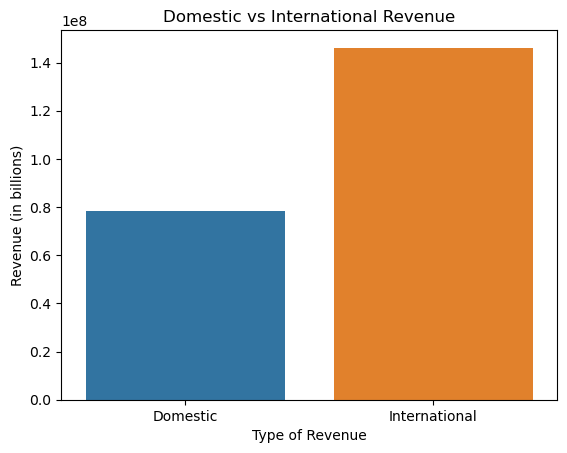

In [103]:
# Create the barplot
sns.barplot(data=scrapped_data[['Domestic', 'International']], errorbar=None)

# Add labels and title
plt.xlabel('Type of Revenue')
plt.ylabel('Revenue (in billions)')
plt.title('Domestic vs International Revenue')

# Show the plot
plt.show()

# Conclusion

If the international revenue is higher than domestic revenue, it suggests that the movie performed better in international markets compared to domestic markets. There is a possibility of Global Appeal where movies may have a broader appeal or relevance to international audiences, leading to higher revenue from international markets.

# 7. Distributors

Make a barplot of `Distributors` and what they made `Total Worldwide Revenue`in revenue.

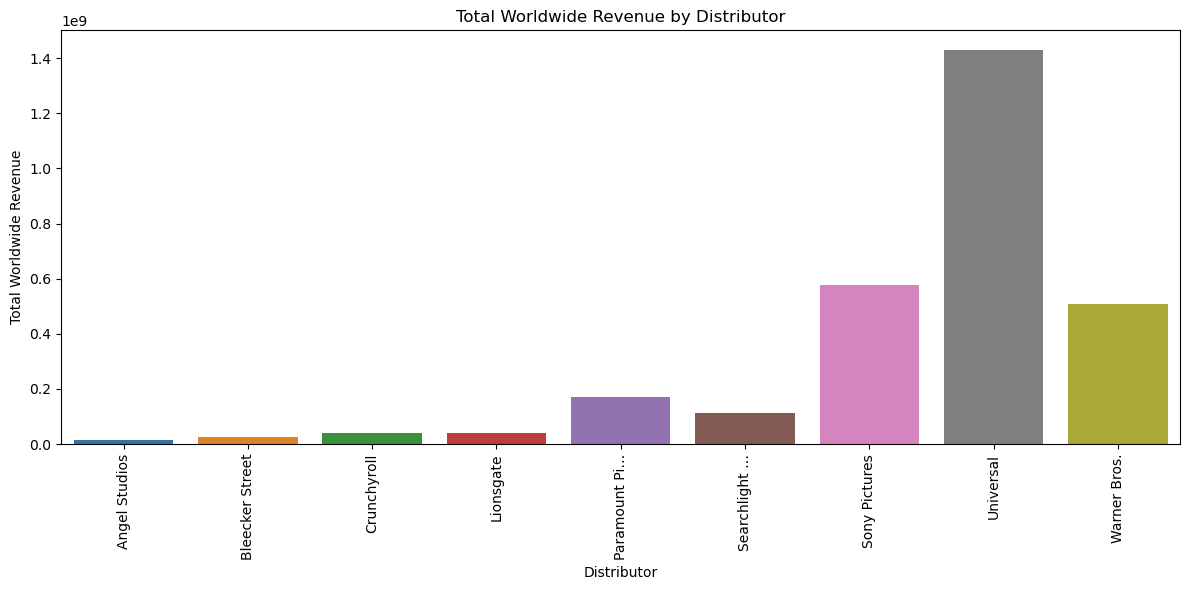

In [105]:
# Aggregate the data to calculate total worldwide revenue for each distributor
distributor_revenue = scrapped_data.groupby('Distributor')['Worldwide'].sum().reset_index()

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=distributor_revenue, x='Distributor', y='Worldwide')
plt.xticks(rotation=90)
plt.xlabel('Distributor')
plt.ylabel('Total Worldwide Revenue')
plt.title('Total Worldwide Revenue by Distributor')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Conclusion

Universal Studios generated the highest total worldwide revenue among the distributors, it could indicate several positive aspects about their performance and market position for example they have strong lineup of successful movies, effective marketing and distribution strategies that ensure their movies reach a wide audience, strong presence in international markets, Universal Studios' brand may be highly recognized and trusted by audiences worldwide and financial success for the studio.

# 8. Universal Studios

Create a barplot for `Universal` in the `Distributor` column.

We are looking at which particular `Movie Title` has the highest `Total Worldwide Revenue`.

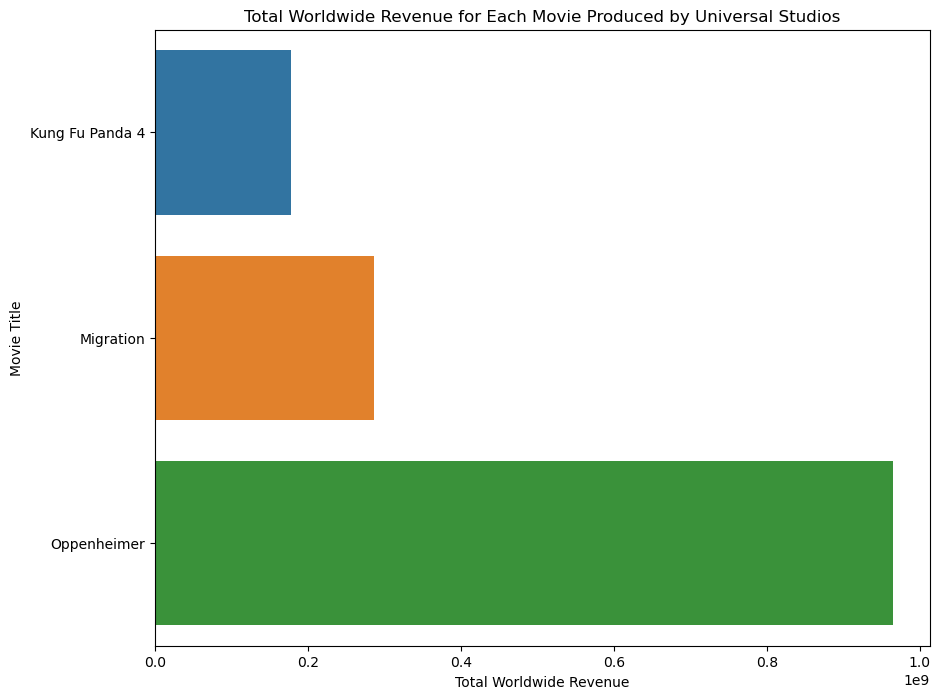

In [111]:
# Filter the DataFrame to include only movies produced by Universal Studios
universal_movies = scrapped_data[scrapped_data['Distributor'] == 'Universal']

# Group by movie title and aggregate the total worldwide revenue
universal_movies_revenue = universal_movies.groupby('Movie Title')['Worldwide'].sum().reset_index()

# Create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=universal_movies_revenue, y='Movie Title', x='Worldwide', orient='h')

# Set labels and title
plt.xlabel('Total Worldwide Revenue')
plt.ylabel('Movie Title')
plt.title('Total Worldwide Revenue for Each Movie Produced by Universal Studios')

# Show the plot
plt.show()

# Conclusion

The success of "Oppenheimer" reflects positively on both the movie itself and the director, Christopher Nolan. It underscores their ability to create compelling and commercially successful cinema that resonates with audiences worldwide.